In [3]:
# Import Libraries
import pandas as pd 
import numpy as np
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [4]:
# Read ChurnPerdictFinal File
proj=pd.read_excel("/content/churn_to_AverageSales.xlsx")

In [19]:
# Check Data info like data_type,column,row and Non-Null etc
proj.shape

(12780, 28)

In [6]:
# Check 1st Five Record of Data
proj.head()

,Unnamed: 0,bussinesID,billing_cycle,country,created_on,last_login,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint,current_bussiness_status,average sales
0,0,c4ca4238a0b923820dcc509a6f75849b,Monthly,United Arab Emirates,2015-07-24 17:45:12,2020-12-16 05:09:02,5,5,593,5465,111802.33,43684.29,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,0,22360.466
1,1,45c48cce2e2d7fbdea1afc51c7c6ad26,Monthly,United Kingdom,2015-02-27 11:32:44,(NULL),0,1,3,2,198.19,89.10,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,198.190
2,2,d3d9446802a44259755d38e6d163e820,Monthly,United States,2015-02-28 01:32:05,2021-01-04 11:02:20,5,10,567,26,257540.08,121470.29,0,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,0,25754.008
3,3,6512bd43d9caa6e02c990b0a82652dca,Monthly,United Kingdom,2015-03-02 06:01:30,2017-12-05 03:00:01,2,2,43,38,2485.78,2030.79,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1242.890
4,4,aab3238922bcc25a6f606eb525ffdc56,Monthly,Pakistan,2015-03-03 02:28:23,2015-12-01 06:37:11,0,1,9,2,1370.00,1120.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1370.000


In [7]:
# Print all Column Name
proj.columns

Index(['Unnamed: 0', 'bussinesID', 'billing_cycle', 'country', 'created_on',
       'last_login', 'tenure', 'stores/franchise', 'no_of_repair_jobs',
       'no_of_customers', 'total_revenue', 'amount_receivable',
       'no_of_purchases', 'use_Paypal', 'use_Cayan', 'use_Stripe',
       'use_MailChimp', 'use_PaypalHere', 'use_SquareDeep',
       'use_MobileSentrix', 'use_CustomerPortal', 'use_PrintNode',
       'use_Square', 'use_SmsGlobal', 'use_SmsBroadcast', 'use_ClickaTell',
       'use_RingCentral', 'use_Square.1', 'use_RepairDeskPay', 'use_FreePBX',
       'use_GoogleCloudPrint', 'current_bussiness_status', 'average sales'],
      dtype='object')

In [8]:
# Remove Unneccesary Columns
to_drop=['Unnamed: 0','bussinesID', 'billing_cycle','created_on', 'last_login']
proj.drop(to_drop, inplace=True, axis=1)
proj

,country,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint,current_bussiness_status,average sales
0,United Arab Emirates,5,5,593,5465,111802.33,43684.29,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,0,22360.466
1,United Kingdom,0,1,3,2,198.19,89.10,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,198.190
2,United States,5,10,567,26,257540.08,121470.29,0,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,0,25754.008
3,United Kingdom,2,2,43,38,2485.78,2030.79,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1242.890
4,Pakistan,0,1,9,2,1370.00,1120.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1370.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,Hong Kong,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0.000
13192,Hong Kong,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0.000
13193,Hong Kong,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0.000
13194,Hong Kong,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0.000


In [9]:
# Check Null Value from Data
print(proj.isna().sum())  

country                     416
tenure                        0
stores/franchise              0
no_of_repair_jobs             0
no_of_customers               0
total_revenue                 0
amount_receivable             0
no_of_purchases               0
use_Paypal                    0
use_Cayan                     0
use_Stripe                    0
use_MailChimp                 0
use_PaypalHere                0
use_SquareDeep                0
use_MobileSentrix             0
use_CustomerPortal            0
use_PrintNode                 0
use_Square                    0
use_SmsGlobal                 0
use_SmsBroadcast              0
use_ClickaTell                0
use_RingCentral               0
use_Square.1                  0
use_RepairDeskPay             0
use_FreePBX                   0
use_GoogleCloudPrint          0
current_bussiness_status      0
average sales                 0
dtype: int64


In [10]:
# Remove All Null Value from Data
proj=proj.dropna(axis=0,how='any') # Use 'any' to del if any null value come in row or col ,'All' use when all values of row empty
print(proj.isna().sum())  
print(proj)

country                     0
tenure                      0
stores/franchise            0
no_of_repair_jobs           0
no_of_customers             0
total_revenue               0
amount_receivable           0
no_of_purchases             0
use_Paypal                  0
use_Cayan                   0
use_Stripe                  0
use_MailChimp               0
use_PaypalHere              0
use_SquareDeep              0
use_MobileSentrix           0
use_CustomerPortal          0
use_PrintNode               0
use_Square                  0
use_SmsGlobal               0
use_SmsBroadcast            0
use_ClickaTell              0
use_RingCentral             0
use_Square.1                0
use_RepairDeskPay           0
use_FreePBX                 0
use_GoogleCloudPrint        0
current_bussiness_status    0
average sales               0
dtype: int64
                    country  tenure  ...  current_bussiness_status  average sales
0      United Arab Emirates       5  ...                         

In [11]:
# Check Each Country Count
proj["country"].value_counts()

United States                       3954
United Kingdom                      1136
Australia                            988
India                                528
Canada                               494
                                    ... 
lesotho                                1
Lao People's Democratic Republic       1
cameroon                               1
portugal                               1
hong kong                              1
Name: country, Length: 246, dtype: int64

In [12]:
# Encode Contry name in Numeric Value
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
proj["country"] = ord_enc.fit_transform(proj[["country"]])
proj[ "country"].head(11)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0     172.0
1     173.0
2     174.0
3     173.0
4     126.0
5     173.0
6     173.0
7       0.0
8      34.0
9       9.0
10      9.0
Name: country, dtype: float64

In [13]:
# Encode All Bolean Value into [0,1]
proj.replace({False: 0, True: 1}, inplace=True)
proj

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,country,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint,current_bussiness_status,average sales
0,172.0,5,5,593,5465,111802.33,43684.29,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,22360.466
1,173.0,0,1,3,2,198.19,89.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,198.190
2,174.0,5,10,567,26,257540.08,121470.29,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,25754.008
3,173.0,2,2,43,38,2485.78,2030.79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1242.890
4,126.0,0,1,9,2,1370.00,1120.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1370.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,73.0,0,1,0,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
13192,73.0,0,1,0,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
13193,73.0,0,1,0,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
13194,73.0,0,1,0,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000


In [14]:
# Check data types after converting
proj.dtypes

country                     float64
tenure                        int64
stores/franchise              int64
no_of_repair_jobs             int64
no_of_customers               int64
total_revenue               float64
amount_receivable           float64
no_of_purchases               int64
use_Paypal                    int64
use_Cayan                     int64
use_Stripe                    int64
use_MailChimp                 int64
use_PaypalHere                int64
use_SquareDeep                int64
use_MobileSentrix             int64
use_CustomerPortal            int64
use_PrintNode                 int64
use_Square                    int64
use_SmsGlobal                 int64
use_SmsBroadcast              int64
use_ClickaTell                int64
use_RingCentral               int64
use_Square.1                  int64
use_RepairDeskPay             int64
use_FreePBX                   int64
use_GoogleCloudPrint          int64
current_bussiness_status      int64
average sales               

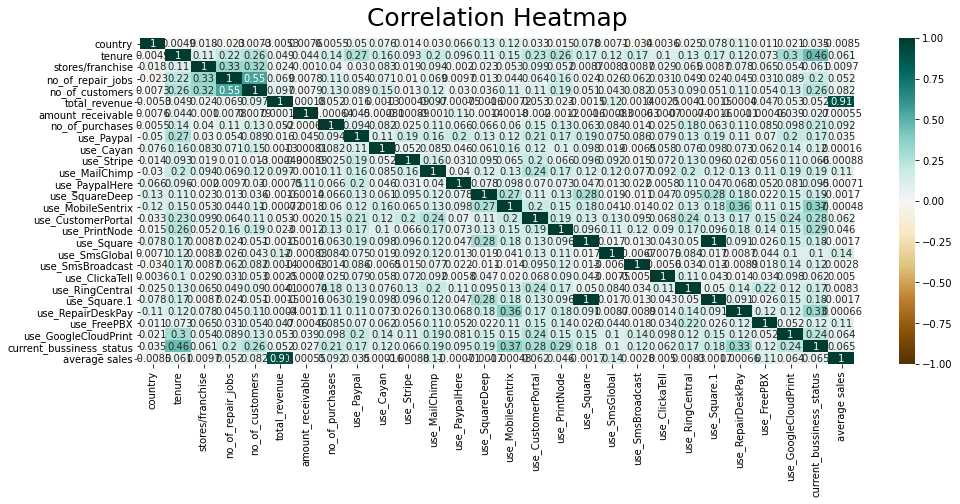

In [15]:
# Check Corelation of attributes on Heat Map with Values
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(proj.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [16]:
#Use Interquartile Range to check outlires range
Q1 = proj.quantile(0.25)
Q3 = proj.quantile(0.75)
IQR = Q3-Q1
IQR

country                     109.0
tenure                        0.0
stores/franchise              0.0
no_of_repair_jobs             3.0
no_of_customers               2.0
total_revenue                 0.0
amount_receivable             0.0
no_of_purchases               0.0
use_Paypal                    0.0
use_Cayan                     0.0
use_Stripe                    0.0
use_MailChimp                 0.0
use_PaypalHere                0.0
use_SquareDeep                0.0
use_MobileSentrix             0.0
use_CustomerPortal            0.0
use_PrintNode                 0.0
use_Square                    0.0
use_SmsGlobal                 0.0
use_SmsBroadcast              0.0
use_ClickaTell                0.0
use_RingCentral               0.0
use_Square.1                  0.0
use_RepairDeskPay             0.0
use_FreePBX                   0.0
use_GoogleCloudPrint          0.0
current_bussiness_status      0.0
average sales                 0.0
dtype: float64

In [17]:
# Remove Outlire 
print(proj < (Q1 - 1.5 * IQR)) |(proj > (Q3 + 1.5 * IQR))

       country  tenure  ...  current_bussiness_status  average sales
0        False   False  ...                     False          False
1        False   False  ...                     False          False
2        False   False  ...                     False          False
3        False   False  ...                     False          False
4        False   False  ...                     False          False
...        ...     ...  ...                       ...            ...
13191    False   False  ...                     False          False
13192    False   False  ...                     False          False
13193    False   False  ...                     False          False
13194    False   False  ...                     False          False
13195    False   False  ...                     False          False

[12780 rows x 28 columns]


TypeError: ignored

**Resampling Technique For Unbalanced Class**

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (**under-sampling**) and/or adding more examples from the minority class (**over-sampling**).

In [20]:
# Predict class count
class_count_0, class_count_1 = proj['current_bussiness_status'].value_counts()

# Separate class 0 and 1
class_0 = proj[proj['current_bussiness_status'] == 0]
class_1 = proj[proj['current_bussiness_status'] == 1] 

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (11549, 28)
class 1: (1231, 28)


**Random Under-Sampling Technique**

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

**Advantage and disadvantages of Under-sampling**
**Advantages**

It can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.

**Disadvantages**

It can discard potentially useful information which could be important for building rule classifiers.
The sample chosen by random under-sampling may be a biased sample. And it will not be an accurate representation of the population. Thereby, resulting in inaccurate results with the actual test data set.

In [ ]:
# According to Count Num of Class_1 we get Random Sample from Class_0 and assign new class_0_under (For Balncing Class 0 and 1)
class_0_under = class_0.sample(class_count_1)

# Concatinate class_0_under and class_1 and assign new variable
test_under = pd.concat([class_0_under, class_1], axis=0)

# Print shape of new class 1 and 0
print("Total class of 1 and 0:",test_under['current_bussiness_status'].value_counts())

# plot the count after under-sampeling
test_under['current_bussiness_status'].value_counts().plot(kind='bar', title='count (target)')


**Random Over-Sampling Technique**

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

**Advantages and Disadvantage of over-sampling**

**Advantages**

Unlike under-sampling, this method leads to no information loss.
Outperforms under sampling

**Disadvantages**

It increases the likelihood of overfitting since it replicates the minority class events.

In [ ]:
# According to Count Num of Class_0 we get Sample from Class_1 and assign new class_1_over (For Balncing Class 0 and 1)
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("Total class of 1 and 0:",test_over['current_bussiness_status'].value_counts())

# plot the count after under-sampeling
test_over['current_bussiness_status'].value_counts().plot(kind='bar', title='count (target)')


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1500, n_classes=2, n_features=15,random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)